In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import time
import requests

## Plot the tendency in testing period under changing workloads with bursts

In [2]:
def plotResForTesting(workload):
    # read historical data
    df = pd.read_csv('k8s_historical_states_discrete_testing_with_bursts.csv')
    results = df[['timestep', 'reward', 'number_of_pods', 'latency', 'info', 'hpa_threshold','cpu_util']]
    podsTrainVis = results[['timestep', 'number_of_pods', 'info']]
    latencyTrainVis = results[['timestep', 'latency', 'info']]
    thesTrainVis = results[['timestep', 'hpa_threshold', 'info']]
    rewardTrainVis = results[['timestep', 'reward', 'info']]
    cpuTrainVis = results[['timestep', 'cpu_util', 'info']]
    
    # plot historical data 
    plt.figure(figsize=(15, 18))
    plt.subplot(3, 2, 1)
    # plt.figure(dpi=120)
    plt.xlabel('round')
    plt.ylabel('number_of_pods')
    plt.title('changes in number of pods during testing')
    plt.axhline(y=5, color='r', linestyle='dashed')
    plt.plot(podsTrainVis['timestep'], podsTrainVis['number_of_pods'])
    plt.subplot(3, 2, 6)
#     plt.vlines((len(workload)-25) / len(workload) * len(latencyTrainVis['timestep']) + 5, 0, max(podsTrainVis['number_of_pods']), colors = "r", linestyles = "dashed")
    plt.xlabel('round')
    plt.ylabel('hpa_threshold')
    plt.title('changes in hpa_threshold during training')
    # 添加此段代码即可
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(thesTrainVis['timestep'], thesTrainVis['hpa_threshold'])
    # plot workload data 
    plt.subplot(3, 2, 2)
    x = [i for i in range(len(workload))]
    plt.xlabel('round')
    plt.ylabel('request/second')
    plt.title('changes in request rate during testing')
    plt.plot(x, workload)
    # plt.show()
    # plt.figure(figsize=(15, 5))
    plt.subplot(3, 2, 5)
    plt.xlabel('round')
    plt.ylabel('reward')
    plt.title('changes in rewards during testing')
    plt.plot(rewardTrainVis['timestep'], rewardTrainVis['reward'])
#     plt.vlines((len(workload)-25) / len(workload) * len(latencyTrainVis['timestep']) + 5, 0, max(rewardTrainVis['reward']), colors = "r", linestyles = "dashed")
    plt.subplot(3, 2, 4)
    plt.xlabel('round')
    plt.ylabel('latency/seconds')
    plt.title('changes in latency during testing')
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
    plt.plot(latencyTrainVis['timestep'], latencyTrainVis['latency'])
#     plt.vlines((len(workload)-25) / len(workload) * len(latencyTrainVis['timestep']) + 5, 0, max(latencyTrainVis['latency']), colors = "r", linestyles = "dashed")
    plt.subplot(3, 2, 3)
    plt.xlabel('round')
    plt.ylabel('cpu_utilization')
    plt.axhline(y=60, color='r', linestyle='dashed')
    plt.title('changes in cpu_utilization during testing')
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(cpuTrainVis['timestep'], cpuTrainVis['cpu_util'])

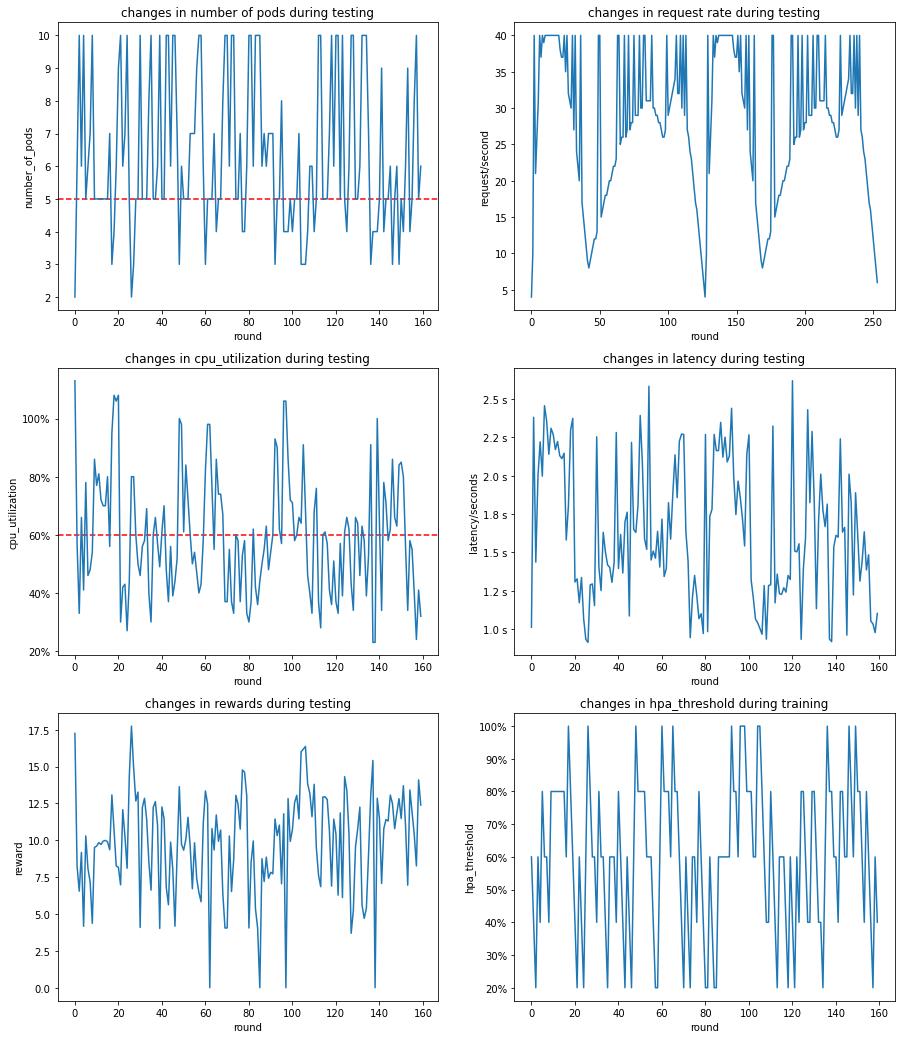

In [3]:
workload = [4, 10, 40, 21, 26, 31, 40, 37, 40, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 38, 37, 37, 40, 35, 40, 32, 31, 30, 40, 27, 40, 24, 22, 20, 40, 17, 15, 13, 11, 9, 8, 9, 10, 11, 12, 12, 13, 40, 40, 15, 16, 17, 18, 18, 19, 20, 20, 21, 22, 22, 23, 40, 40, 25, 26, 26, 40, 26, 27, 40, 27, 28, 28, 40, 29, 29, 29, 40, 30, 30, 40, 40, 31, 31, 31, 31, 40, 30, 30, 29, 29, 28, 28, 27, 26, 26, 27, 40, 29, 30, 31, 32, 33, 34, 40, 32, 32, 40, 30, 40, 29, 40, 27, 26, 24, 23, 21, 19, 17, 16, 14, 12, 10, 8, 6,
            4, 10, 40, 21, 26, 31, 40, 37, 40, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 38, 37, 37, 40, 35, 40, 32, 31, 30, 40, 27, 40, 24, 22, 20, 40, 17, 15, 13, 11, 9, 8, 9, 10, 11, 12, 12, 13, 40, 40, 15, 16, 17, 18, 18, 19, 20, 20, 21, 22, 22, 23, 40, 40, 25, 26, 26, 40, 26, 27, 40, 27, 28, 28, 40, 29, 29, 29, 40, 30, 30, 40, 40, 31, 31, 31, 31, 40, 30, 30, 29, 29, 28, 28, 27, 26, 26, 27, 40, 29, 30, 31, 32, 33, 34, 40, 32, 32, 40, 30, 40, 29, 40, 27, 26, 24, 23, 21, 19, 17, 16, 14, 12, 10, 8, 6]
plotResForTesting(workload)

## Plot the tendency in testing period under changing and stable workloads

In [4]:
def plotResForTesting(workload):
    # read historical data
    df = pd.read_csv('k8s_historical_states_discrete_testing.csv')
    results = df[['timestep', 'reward', 'number_of_pods', 'latency', 'info', 'hpa_threshold','cpu_util']]
    podsTrainVis = results[['timestep', 'number_of_pods', 'info']]
    latencyTrainVis = results[['timestep', 'latency', 'info']]
    thesTrainVis = results[['timestep', 'hpa_threshold', 'info']]
    rewardTrainVis = results[['timestep', 'reward', 'info']]
    cpuTrainVis = results[['timestep', 'cpu_util', 'info']]
    # plot historical data 
    plt.figure(figsize=(15, 18))
    plt.subplot(3, 2, 1)
    # plt.figure(dpi=120)
    plt.xlabel('round')
    plt.ylabel('number_of_pods')
    plt.title('changes in number of pods during testing')
    plt.axhline(y=5, color='r', linestyle='dashed')
    plt.plot(podsTrainVis['timestep'], podsTrainVis['number_of_pods'])
#     plt.vlines((len(workload)-25) / len(workload) * len(latencyTrainVis['timestep']) + 5, 0, max(podsTrainVis['number_of_pods']), colors = "r", linestyles = "dashed")
    plt.subplot(3, 2, 2)
#     plt.figure(dpi=120)
#     plt.xlabel('round')
#     plt.ylabel('hpa_threshold')
#     plt.title('changes in hpa_threshold during training')
#     # 添加此段代码即可
#     def to_percent(temp, position):
#         return '%1.0f'%(temp) + '%'
#     plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
#     plt.plot(thesTrainVis['timestep'], thesTrainVis['hpa_threshold'])
#     plt.vlines(len(workload)-25, 0, 40, colors = "r", linestyles = "dashed")
    # plot workload data 
    x = [i for i in range(len(workload))]
    plt.xlabel('round')
    plt.ylabel('request/second')
    plt.title('changes in request rate during testing')
    plt.plot(x, workload)
    # plt.show()
    # plt.figure(figsize=(15, 5))
    plt.subplot(3, 2, 5)
    plt.xlabel('round')
    plt.ylabel('reward')
    plt.title('changes in rewards during testing')
    plt.plot(rewardTrainVis['timestep'], rewardTrainVis['reward'])
#     plt.vlines((len(workload)-25) / len(workload) * len(latencyTrainVis['timestep']) + 5, 0, max(rewardTrainVis['reward']), colors = "r", linestyles = "dashed")
    plt.subplot(3, 2, 4)
    plt.xlabel('round')
    plt.ylabel('latency/seconds')
    plt.title('changes in latency during testing')
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
    plt.plot(latencyTrainVis['timestep'], latencyTrainVis['latency'])
#     plt.vlines((len(workload)-25) / len(workload) * len(latencyTrainVis['timestep']) + 5, 0, max(latencyTrainVis['latency']), colors = "r", linestyles = "dashed")
    plt.subplot(3, 2, 3)
    plt.xlabel('round')
    plt.ylabel('cpu_utilization')
    plt.axhline(y=60, color='r', linestyle='dashed')
    plt.title('changes in cpu_utilization during testing')
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(cpuTrainVis['timestep'], cpuTrainVis['cpu_util'])

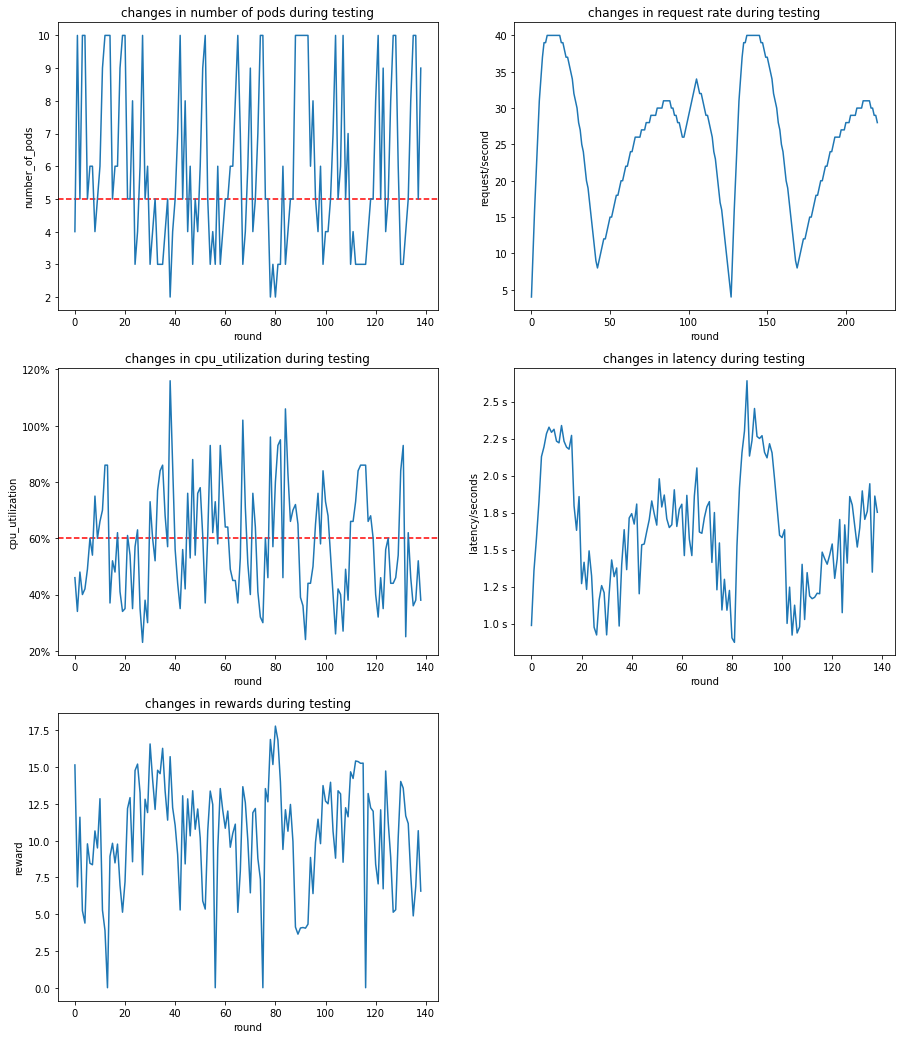

In [5]:
workload = [4, 10, 16, 21, 26, 31, 34, 37, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 38, 37, 37, 36, 35, 34, 32, 31, 30, 28, 27, 25, 24, 22, 20, 19, 17, 15, 13, 11, 9,
            8, 9, 10, 11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20, 21, 22, 22, 23, 24, 24, 25, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30,
    30, 30, 31, 31, 31, 31, 31, 30, 30, 29, 29,
    28, 28, 27, 26, 26, 27, 28, 29, 30, 31, 32, 33, 34, 33, 32, 32, 31, 30, 29, 29, 28, 27, 26, 24, 23, 21, 19, 17, 16, 14, 12, 10, 8, 6, 4, 10, 16, 21, 26, 31, 34, 37, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 38, 37, 37, 36, 35, 34, 32, 31, 30, 28, 27, 25, 24, 22, 20, 19, 17, 15, 13, 11, 9,
            8, 9, 10, 11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20, 21, 22, 22, 23, 24, 24, 25, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30,
    30, 30, 31, 31, 31, 31, 31, 30, 30, 29, 29,
    28]
plotResForTesting(workload)